In [1]:
import os
import datetime

import xarray as xr
import pandas as pd
from netCDF4 import Dataset as netcdf_dataset

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
file_dir = '/home/qt/Downloads'
file_path = os.path.join(file_dir,'global-analysis-forecast-wav-001-027_1609634765852.nc')
dataset = netcdf_dataset(file_path)

dataset_xr = xr.open_dataset(file_path)
time_xr = dataset_xr['time']
t0 = time_xr[0]
ts = pd.to_datetime(str(t0.data)) 
time_string = ts.strftime('%Y.%m.%d %Hh:%M')

minlon, maxlon, minlat, maxlat = (5, 18, 67, 75)
proj = ccrs.PlateCarree()

lats = dataset.variables['latitude'][:]
lons = dataset.variables['longitude'][:]


In [3]:
def get_min_max(wave_dict):
    wave_min, wave_max = 0, 0
    for wave in wave_dict.keys():  
        wave_data = dataset.variables[wave][0, :, :]
        temp_min = wave_data.min()
        temp_max = wave_data.max()
        if temp_min < wave_min:
            wave_min = temp_min
        if temp_max > wave_max:
            wave_max = temp_max
    return(wave_min, wave_max)

In [4]:
def draw_wave_map(wave_var, wave_name, w_min, w_max):
    wave_data = dataset.variables[wave_var][0, :, :]
    fig = plt.figure(figsize=(12, 6))
    main_ax = fig.add_subplot(1, 1, 1, projection=proj)
    main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
    main_ax.gridlines(draw_labels=True)
    main_ax.coastlines()
    main_ax.set_title(wave_name +" " + time_string, fontsize=16)
    p = main_ax.pcolormesh(lons, lats, wave_data, vmin = w_min, vmax = w_max)
    fig.colorbar(p, ax=main_ax)

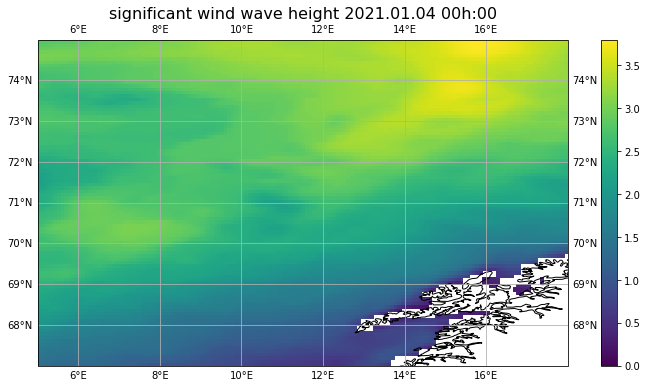

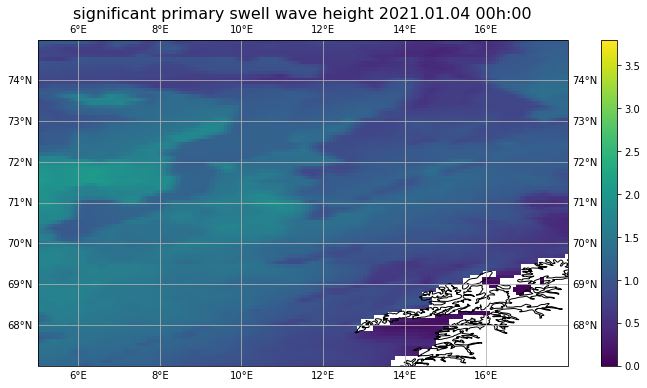

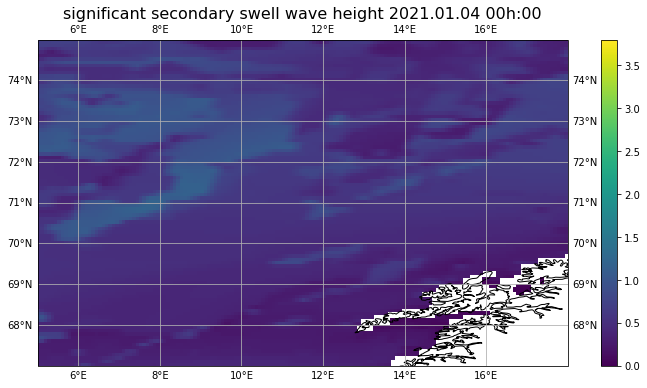

In [5]:
#wave_types = ['VHM0_WW','VHM0_SW1','VHM0_SW2']

wave_dict = {"VHM0_WW": "significant wind wave height",
            "VHM0_SW1": "significant primary swell wave height",
            "VHM0_SW2": "significant secondary swell wave height"}

w_min, w_max = get_min_max(wave_dict)

for wave, wave_name in wave_dict.items():    
    draw_wave_map(wave, wave_name, w_min, w_max)